In [1]:
from __future__ import division
import networkx 
import project
import math
import matplotlib.pyplot as plt

In [2]:
%matplotlib

Using matplotlib backend: MacOSX


In [2]:
def run_sim_and_plot(N, t, reps, betas, alphas):
    """Runs the simulation and plots the results with each alpha in the list of guesses for alpha."""
    graphs = project.create_WS_graphs(N,betas)
    averages = project.avg_randwalks(graphs,t,reps)
    runs = []
    for i in range(len(graphs)):
        runs.append(project.Run(betas[i], averages[i]))
    for alpha in alphas:
        fig = plt.figure()
        x_vals, y_vals = project.transform(runs, alpha)
        fig.suptitle('alpha = ' + str(alpha))
        plt.scatter(x_vals, y_vals)

In [31]:
def run_sim_and_plot_ER(N, t, reps, p):
    """Utility function: runs the simulation for an E-R graph and plots s(t) against
    t to see if the simulation works correctly (we expect a line)."""
    graphs = [networkx.erdos_renyi_graph(N, p)]
    runs = project.avg_randwalks(graphs,t,reps)
    run = runs[0]
    x_vals = []
    y_vals = []
    for i in range(1,len(run)):
        x_vals.append(i)
        y_vals.append(run[i])
    plt.scatter(x_vals, y_vals)

In [32]:
def run_sim_and_plot_path(N,t,reps):
    """Utility function: runs the simulation for a path and plots s(t) against t 
    to see if the simulation works correctly (we expect a sqrt curve)."""
    graphs = [networkx.path_graph(N)]
    runs = project.avg_randwalks(graphs,t,reps)
    run = runs[0]
    x_vals = []
    y_vals = []
    for i in range(1,len(run)):
        x_vals.append(i)
        y_vals.append(run[i])
    plt.scatter(x_vals, y_vals)

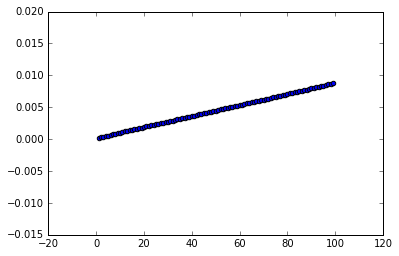

In [33]:
run_sim_and_plot_ER(10000, 100, 10, 0.001)

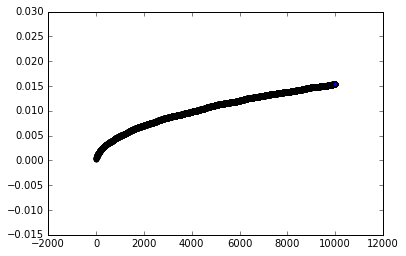

In [34]:
run_sim_and_plot_path(10000, 10000, 100)

In [ ]:
x_vals_1, y_vals_1 = run_sim_WS(10**5, 10**5, 100, [10**(-4), 10**(-3.5), 10**(-3), 10**(-2.5)], 2)

In [ ]:
x_vals_2, y_vals_2 = run_sim_newman(10**5, 10**5, 100, [10**(-4), 10**(-3.5), 10**(-3), 10**(-2.5)], 2)

In [5]:
fig = plt.figure()

In [6]:
fig2 = plt.figure()

In [7]:
ax = fig.add_subplot(1,1,1)

In [8]:
ax.set_xscale('log')

In [9]:
ax.set_yscale('log')

In [13]:
ax.scatter(x_vals_1,y_vals_1)

In [10]:
bx = fig2.add_subplot(1,1,1)

In [11]:
bx.set_xscale('log')

In [12]:
bx.set_yscale('log')

In [17]:
bx.scatter(x_vals_2,y_vals_2)

In [3]:
def run_sim_WS(N, t, reps, betas, alpha):
    """Runs the simulation and plots the results with the alpha given."""
    graphs = project.create_WS_graphs(N,betas)
    averages = project.avg_randwalks(graphs,t,reps)
    runs = []
    for i in range(len(graphs)):
        runs.append(project.Run(betas[i], averages[i]))
    x_vals, y_vals = project.transform(runs, alpha)
    return x_vals, y_vals

In [4]:
def run_sim_newman(N, t, reps, betas, alpha):
    """Runs the simulation and plots the results with the alpha given."""
    graphs = project.create_newman_WS_graphs(N,betas)
    averages = project.avg_randwalks(graphs,t,reps)
    runs = []
    for i in range(len(graphs)):
        runs.append(project.Run(betas[i], averages[i]))
    x_vals, y_vals = project.transform(runs, alpha)
    return x_vals, y_vals